# Model Baseline

## Naïve and Seasonal Naïve

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
internal_train_data = pd.read_csv("data/3_internal_train_data.csv")
internal_validation_data = pd.read_csv("data/3_internal_validation_data.csv")

In [4]:
internal_train_data['Date'] = pd.to_datetime(internal_train_data['Date'])
internal_validation_data['Date'] = pd.to_datetime(internal_validation_data['Date'])

In [3]:
last_value = internal_train_data['Total_FTE'].iloc[-1]
print(last_value)

5060


In [18]:
import matplotlib.dates as mdates

In [21]:
def compute_seasonal_naive_monthly(
    internal_train_data: pd.DataFrame,
    internal_validation_data: pd.DataFrame,
    seasonal_period: int
) -> tuple[float, float, float]:

    train_data = internal_train_data.copy().reset_index(drop=True)
    val_data = internal_validation_data.copy().reset_index(drop=True)

    history = train_data[['Date', 'Total_FTE']].copy()
    seasonal_naive_predictions = []

    for i in range(len(val_data)):
        if len(history) >= seasonal_period:
            seasonal_value = history['Total_FTE'].iloc[-seasonal_period]
        else:
            seasonal_value = history['Total_FTE'].iloc[-1]

        seasonal_naive_predictions.append(seasonal_value)

        history = pd.concat(
            [history, val_data.loc[[i], ['Date', 'Total_FTE']]],
            ignore_index=True
        )

    mae_seasonal = mean_absolute_error(
        val_data['Total_FTE'],
        seasonal_naive_predictions
    )
    mse_seasonal = mean_squared_error(
        val_data['Total_FTE'],
        seasonal_naive_predictions
    )
    rmse_seasonal = np.sqrt(mse_seasonal)

    print("Seasonal Naïve Baseline Results (Monthly):")
    print(f"Seasonal period used: {seasonal_period} months")
    print(f"MAE: {mae_seasonal:.2f}")
    print(f"MSE: {mse_seasonal:.2f}")
    print(f"RMSE: {rmse_seasonal:.2f}")

    plt.plot(
        train_data['Date'],
        train_data['Total_FTE'],
        label='Train',
        color='blue',
        alpha=0.7
    )
    plt.plot(
        val_data['Date'],
        val_data['Total_FTE'],
        label='Validation (Actual)',
        color='green',
        alpha=0.7
    )
    plt.plot(
        val_data['Date'],
        seasonal_naive_predictions,
        label=f'Seasonal Naïve ({seasonal_period} months)',
        color='orange',
        linestyle='--',
        linewidth=1.5,
        alpha=0.7
    )
    plt.axvline(
        train_data['Date'].iloc[-1],
        color='gray',
        linestyle=':',
        linewidth=1,
        label='Train/Val Split'
    )
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    plt.xlabel('Date')
    plt.ylabel('Total FTE')
    plt.title(f'Seasonal Naïve Monthly Forecast ({seasonal_period} months)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return mae_seasonal, mse_seasonal, rmse_seasonal


Seasonal Naïve Baseline Results (Monthly):
Seasonal period used: 1 months
MAE: 121.58
MSE: 26444.08
RMSE: 162.62


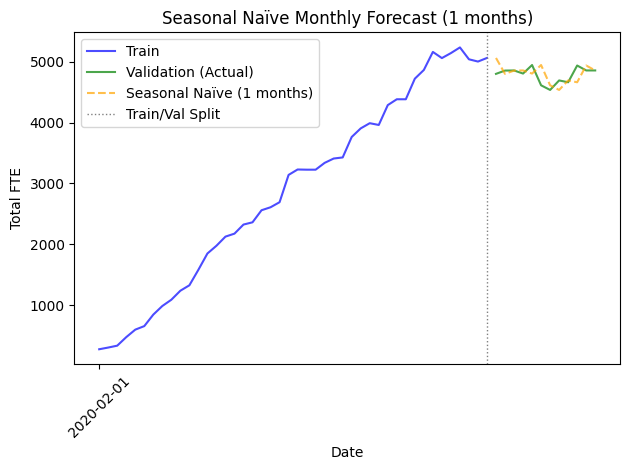

Seasonal Naïve Baseline Results (Monthly):
Seasonal period used: 3 months
MAE: 188.58
MSE: 46091.25
RMSE: 214.69


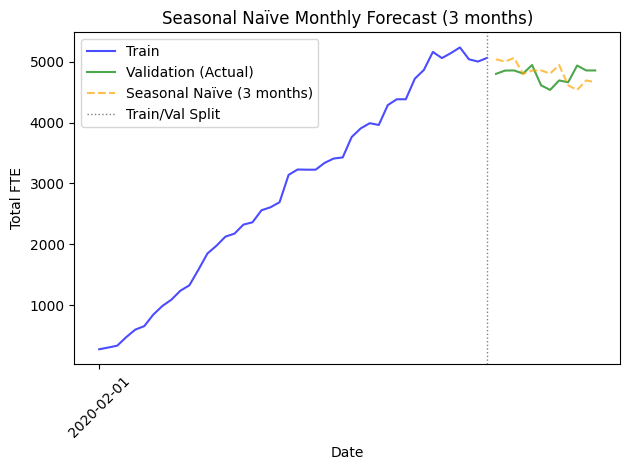

Seasonal Naïve Baseline Results (Monthly):
Seasonal period used: 6 months
MAE: 229.08
MSE: 64199.75
RMSE: 253.38


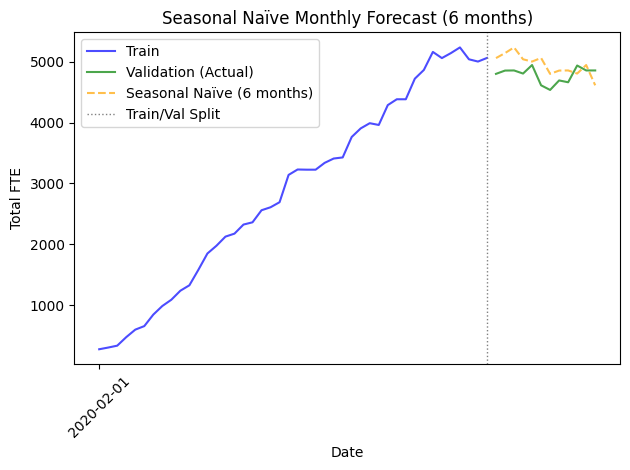

Seasonal Naïve Baseline Results (Monthly):
Seasonal period used: 12 months
MAE: 347.25
MSE: 158226.58
RMSE: 397.78


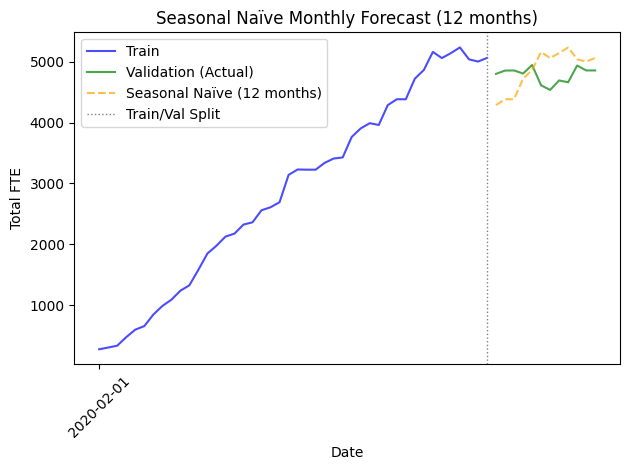

Seasonal Naïve Baseline Results (Monthly):
Seasonal period used: 24 months
MAE: 1341.33
MSE: 1947317.67
RMSE: 1395.46


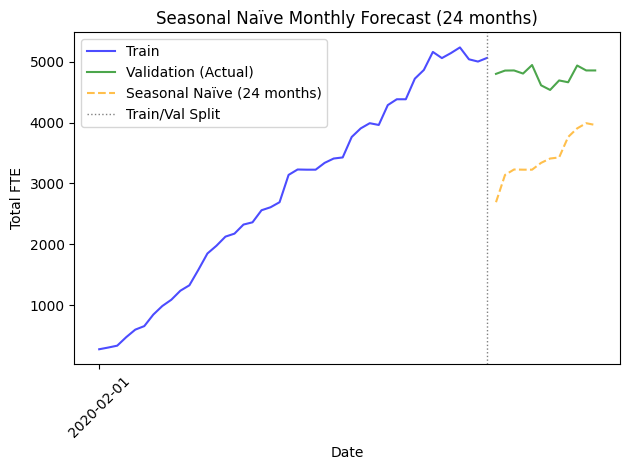

In [22]:
seasonal_periods = [1, 3, 6, 12, 24]
for period in seasonal_periods:
    compute_seasonal_naive_monthly(internal_train_data, internal_validation_data, period)